C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\ferna\AppData\Local\Temp\ipykernel_12512\2298481380.py:66: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  'iqr': stats.iqr(data),



Detailed Process Metrics:

Security Process:
  mean: 9.06
  median: 8.91
  std: 2.31
  cv: 0.26
  skewness: 0.24
  kurtosis: -0.61
  q1: 7.26
  q3: 10.71
  iqr: 3.45
  95th_percentile: 13.19
  99th_percentile: 14.24

Total_Time Process:
  mean: 21.06
  median: 20.91
  std: 2.31
  cv: 0.11
  skewness: 0.24
  kurtosis: -0.61
  q1: 19.26
  q3: 22.71
  iqr: 3.45
  95th_percentile: 25.19
  99th_percentile: 26.24

Check_in Process:
  mean: 5.00
  median: 5.00
  std: 0.00
  cv: 0.00
  skewness: 0.00
  kurtosis: -3.00
  q1: 5.00
  q3: 5.00
  iqr: 0.00
  95th_percentile: 5.00
  99th_percentile: 5.00

Gate_Allocation Process:
  mean: 3.00
  median: 3.00
  std: 0.00
  cv: 0.00
  skewness: 0.00
  kurtosis: -3.00
  q1: 3.00
  q3: 3.00
  iqr: 0.00
  95th_percentile: 3.00
  99th_percentile: 3.00

Transactions Process:
  mean: 4.00
  median: 4.00
  std: 0.00
  cv: 0.00
  skewness: 0.00
  kurtosis: -3.00
  q1: 4.00
  q3: 4.00
  iqr: 0.00
  95th_percentile: 4.00
  99th_percentile: 4.00


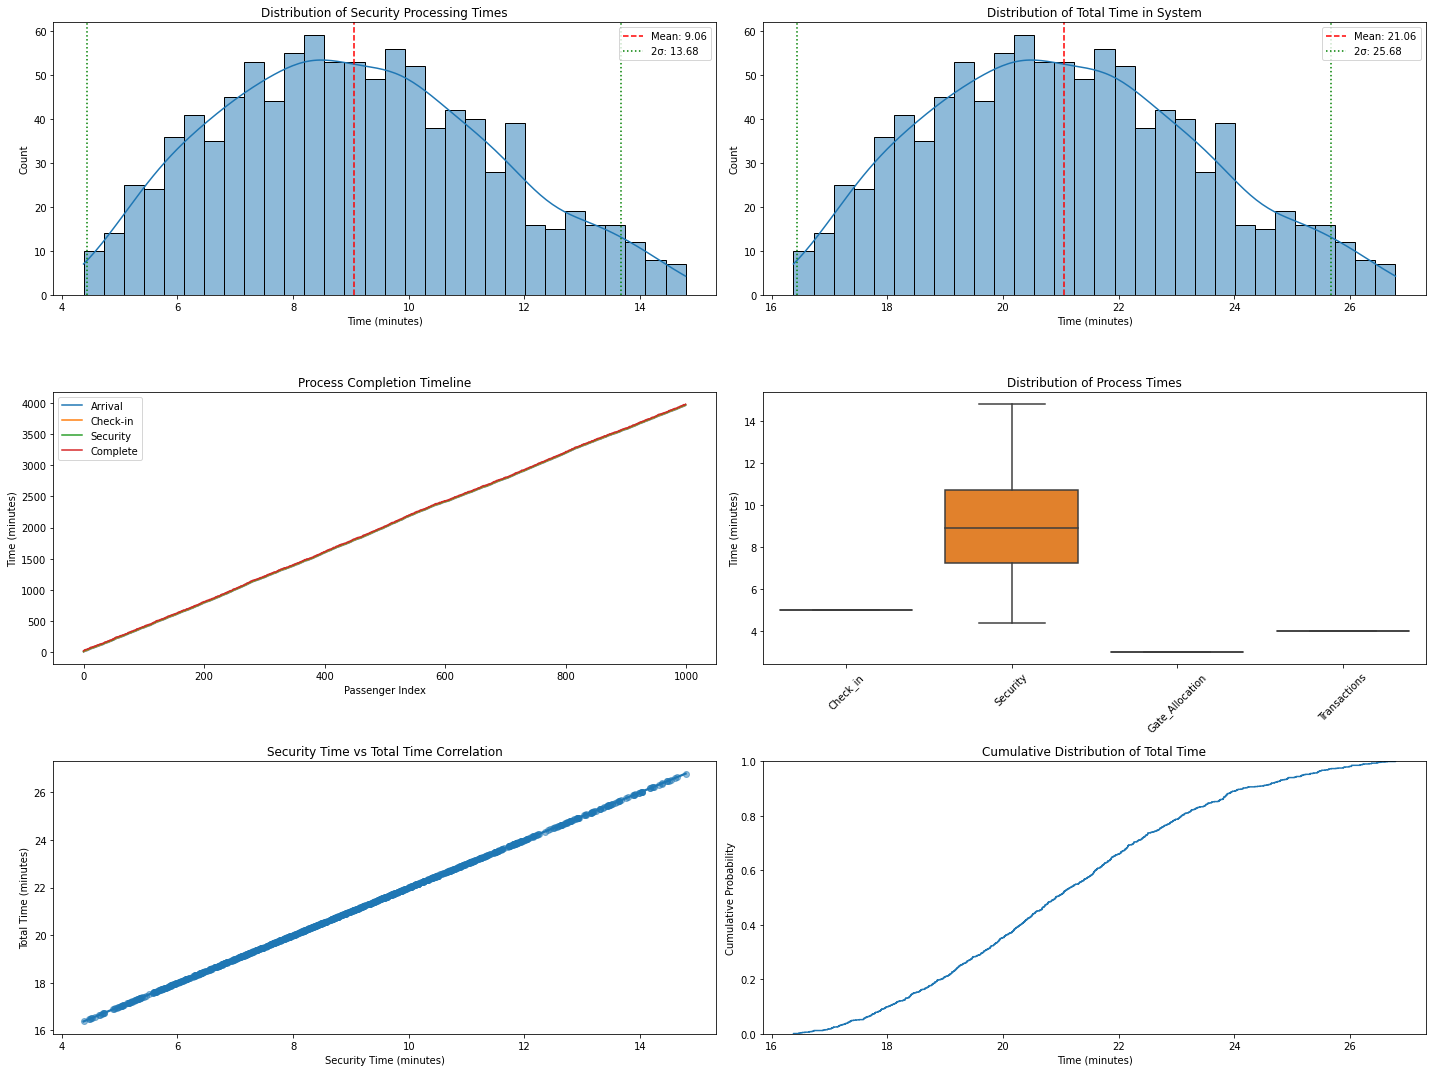

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def simulate_airport_process(num_passengers=1000, seed=42):
    np.random.seed(seed)
    
    # Generate arrival times using uniform distribution
    arrivals = np.random.uniform(2, 6, num_passengers)
    
    # Fixed times for other processes
    check_in_times = np.full(num_passengers, 5)  # Constant 5 minutes
    gate_allocation_times = np.full(num_passengers, 3)  # Constant 3 minutes
    transaction_times = np.full(num_passengers, 4)  # Constant 4 minutes
    
    # Variable security times using triangular distribution
    security_times = np.random.triangular(
        left=4, mode=8, right=15, size=num_passengers
    )
    
    # Calculate cumulative times
    cumulative_times = pd.DataFrame({
        'Arrival_Intervals': arrivals,
        'Check_in': check_in_times,
        'Security': security_times,
        'Gate_Allocation': gate_allocation_times,
        'Transactions': transaction_times
    })
    
    # Calculate actual arrival times (cumulative sum of intervals)
    cumulative_times['Absolute_Arrival'] = np.cumsum(cumulative_times['Arrival_Intervals'])
    
    # Calculate process completion times
    cumulative_times['Check_in_Complete'] = (cumulative_times['Absolute_Arrival'] + 
                                           cumulative_times['Check_in'])
    cumulative_times['Security_Complete'] = (cumulative_times['Check_in_Complete'] + 
                                           cumulative_times['Security'])
    cumulative_times['Transaction_Complete'] = (cumulative_times['Security_Complete'] + 
                                              cumulative_times['Transactions'])
    cumulative_times['Process_Complete'] = (cumulative_times['Transaction_Complete'] + 
                                          cumulative_times['Gate_Allocation'])
    
    # Calculate total time in system for each passenger
    cumulative_times['Total_Time'] = (cumulative_times['Process_Complete'] - 
                                    cumulative_times['Absolute_Arrival'])
    
    return cumulative_times

def analyze_uncertainty(simulation_data):
    """Calculate detailed uncertainty metrics for each process"""
    metrics = {}
    
    for column in ['Security', 'Total_Time', 'Check_in', 'Gate_Allocation', 'Transactions']:
        data = simulation_data[column]
        metrics[column] = {
            'mean': np.mean(data),
            'median': np.median(data),
            'std': np.std(data),
            'cv': stats.variation(data),  # Coefficient of variation
            'skewness': stats.skew(data),
            'kurtosis': stats.kurtosis(data),
            'q1': np.percentile(data, 25),
            'q3': np.percentile(data, 75),
            'iqr': stats.iqr(data),
            '95th_percentile': np.percentile(data, 95),
            '99th_percentile': np.percentile(data, 99)
        }
    
    return metrics

def analyze_and_plot_enhanced(simulation_data):
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Security Times Distribution with confidence intervals
    plt.subplot(3, 2, 1)
    sns.histplot(simulation_data['Security'], bins=30, kde=True)
    mean_security = np.mean(simulation_data['Security'])
    std_security = np.std(simulation_data['Security'])
    plt.axvline(mean_security, color='r', linestyle='--', label=f'Mean: {mean_security:.2f}')
    plt.axvline(mean_security + 2*std_security, color='g', linestyle=':', 
                label=f'2σ: {mean_security + 2*std_security:.2f}')
    plt.axvline(mean_security - 2*std_security, color='g', linestyle=':')
    plt.title('Distribution of Security Processing Times')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Count')
    plt.legend()
    
    # 2. Total Time in System with confidence intervals
    plt.subplot(3, 2, 2)
    sns.histplot(simulation_data['Total_Time'], bins=30, kde=True)
    mean_total = np.mean(simulation_data['Total_Time'])
    std_total = np.std(simulation_data['Total_Time'])
    plt.axvline(mean_total, color='r', linestyle='--', label=f'Mean: {mean_total:.2f}')
    plt.axvline(mean_total + 2*std_total, color='g', linestyle=':', 
                label=f'2σ: {mean_total + 2*std_total:.2f}')
    plt.axvline(mean_total - 2*std_total, color='g', linestyle=':')
    plt.title('Distribution of Total Time in System')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Count')
    plt.legend()
    
    # 3. Process Completion Timeline
    plt.subplot(3, 2, 3)
    plt.plot(simulation_data['Absolute_Arrival'], label='Arrival')
    plt.plot(simulation_data['Check_in_Complete'], label='Check-in')
    plt.plot(simulation_data['Security_Complete'], label='Security')
    plt.plot(simulation_data['Process_Complete'], label='Complete')
    plt.title('Process Completion Timeline')
    plt.xlabel('Passenger Index')
    plt.ylabel('Time (minutes)')
    plt.legend()
    
    # 4. Box plots for all process times
    plt.subplot(3, 2, 4)
    process_times = simulation_data[['Check_in', 'Security', 'Gate_Allocation', 'Transactions']]
    sns.boxplot(data=process_times)
    plt.title('Distribution of Process Times')
    plt.ylabel('Time (minutes)')
    plt.xticks(rotation=45)
    
    # 5. Security Wait Time vs Total Time Correlation with regression line
    plt.subplot(3, 2, 5)
    sns.regplot(data=simulation_data, x='Security', y='Total_Time', 
                scatter_kws={'alpha':0.5})
    plt.title('Security Time vs Total Time Correlation')
    plt.xlabel('Security Time (minutes)')
    plt.ylabel('Total Time (minutes)')
    
    # 6. Cumulative Distribution Function of Total Time
    plt.subplot(3, 2, 6)
    sns.ecdfplot(data=simulation_data['Total_Time'])
    plt.title('Cumulative Distribution of Total Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Cumulative Probability')
    
    plt.tight_layout()
    
    # Calculate enhanced statistics
    uncertainty_metrics = analyze_uncertainty(simulation_data)
    
    return uncertainty_metrics

# Run simulation
sim_data = simulate_airport_process(num_passengers=1000)

# Analyze and plot results
metrics = analyze_and_plot_enhanced(sim_data)

# Print detailed statistics
print("\nDetailed Process Metrics:")
for process, stats in metrics.items():
    print(f"\n{process} Process:")
    for metric, value in stats.items():
        print(f"  {metric}: {value:.2f}")